In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime as dt
import yfinance as yf
import contextlib
sns.set_style('darkgrid')

In [66]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'NFLX', 'GOOGL']
end_date = dt.datetime(2023, 1, 1); start_date = end_date - dt.timedelta(days=4*365)
stock = yf.download(tickers, start=start_date, end=end_date)
stock.head()

C:\Users\sayak\AppData\Local\Temp\ipykernel_6916\2959137352.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


Price           Close                                                   High  \
Ticker           AAPL      GOOGL       MSFT        NFLX      NVDA       AAPL   
Date                                                                           
2019-01-02  37.617851  52.419621  94.945518  267.660004  3.377545  37.839387   
2019-01-03  33.870842  50.967831  91.452660  271.200012  3.173483  34.711717   
2019-01-04  35.316765  53.582150  95.706047  297.570007  3.376801  35.385847   
2019-01-07  35.238148  53.475296  95.828110  315.339996  3.555571  35.452537   
2019-01-08  35.909904  53.944973  96.522919  320.269989  3.467053  36.164789   

Price                                                   ...       Open  \
Ticker          GOOGL       MSFT        NFLX      NVDA  ...       AAPL   
Date                                                    ...              
2019-01-02  52.723299  95.537048  269.750000  3.433581  ...  36.896080   
2019-01-03  52.995173  94.072300  275.790009  3.351262  ...  34.297233   
2019-01-04  53.678075  96.250633  297.799988  3.414984  ...  34.428249   
2019-01-07  53.812272  96.964225  316.799988  3.592515  ...  35.421569   
2019-01-08  54.341593  97.621475  320.589996  3.639377  ...  35.626436   

Price                                                      Volume            \
Ticker          GOOGL       MSFT        NFLX      NVDA       AAPL     GOOGL   
Date                                                                          
2019-01-02  51.053811  93.471384  259.279999  3.239190  148158800  31868000   
2019-01-03  52.220321  93.987792  270.200012  3.317293  365248800  41960000   
2019-01-04  51.817233  93.630993  281.880005  3.246628  234428400  46022000   
2019-01-07  53.726289  95.433757  302.100006  3.434076  219111200  47446000   
2019-01-08  53.976283  96.748262  319.980011  3.637145  164101200  35414000   

Price                                      
Ticker          MSFT      NFLX       NVDA  
Date                                       
2019-01-02  35329300  11679500  508752000  
2019-01-03  42579100  14969600  705552000  
2019-01-04  44060600  19330100  585620000  
2019-01-07  35656100  18620100  709160000  
2019-01-08  31514400  15359200  786016000  

[5 rows x 25 columns]

In [67]:
close_prices = stock['Close']
log_returns = np.log(close_prices/close_prices.shift(1))
log_returns.dropna(inplace=True)
log_returns.head()

Ticker,AAPL,GOOGL,MSFT,NFLX,NVDA
Date,,,,,
2019-01-03,-0.104924,-0.028086,-0.037482,0.013139,-0.062319
2019-01-04,0.041803,0.050021,0.045460,0.092793,0.062099
2019-01-07,-0.002229,-0.001996,0.001275,0.058002,0.051587
2019-01-08,0.018884,0.008745,0.007224,0.015513,-0.025211
2019-01-09,0.016839,-0.003433,0.014198,-0.000968,0.019476


In [68]:
divmod(5,2)

(2, 1)

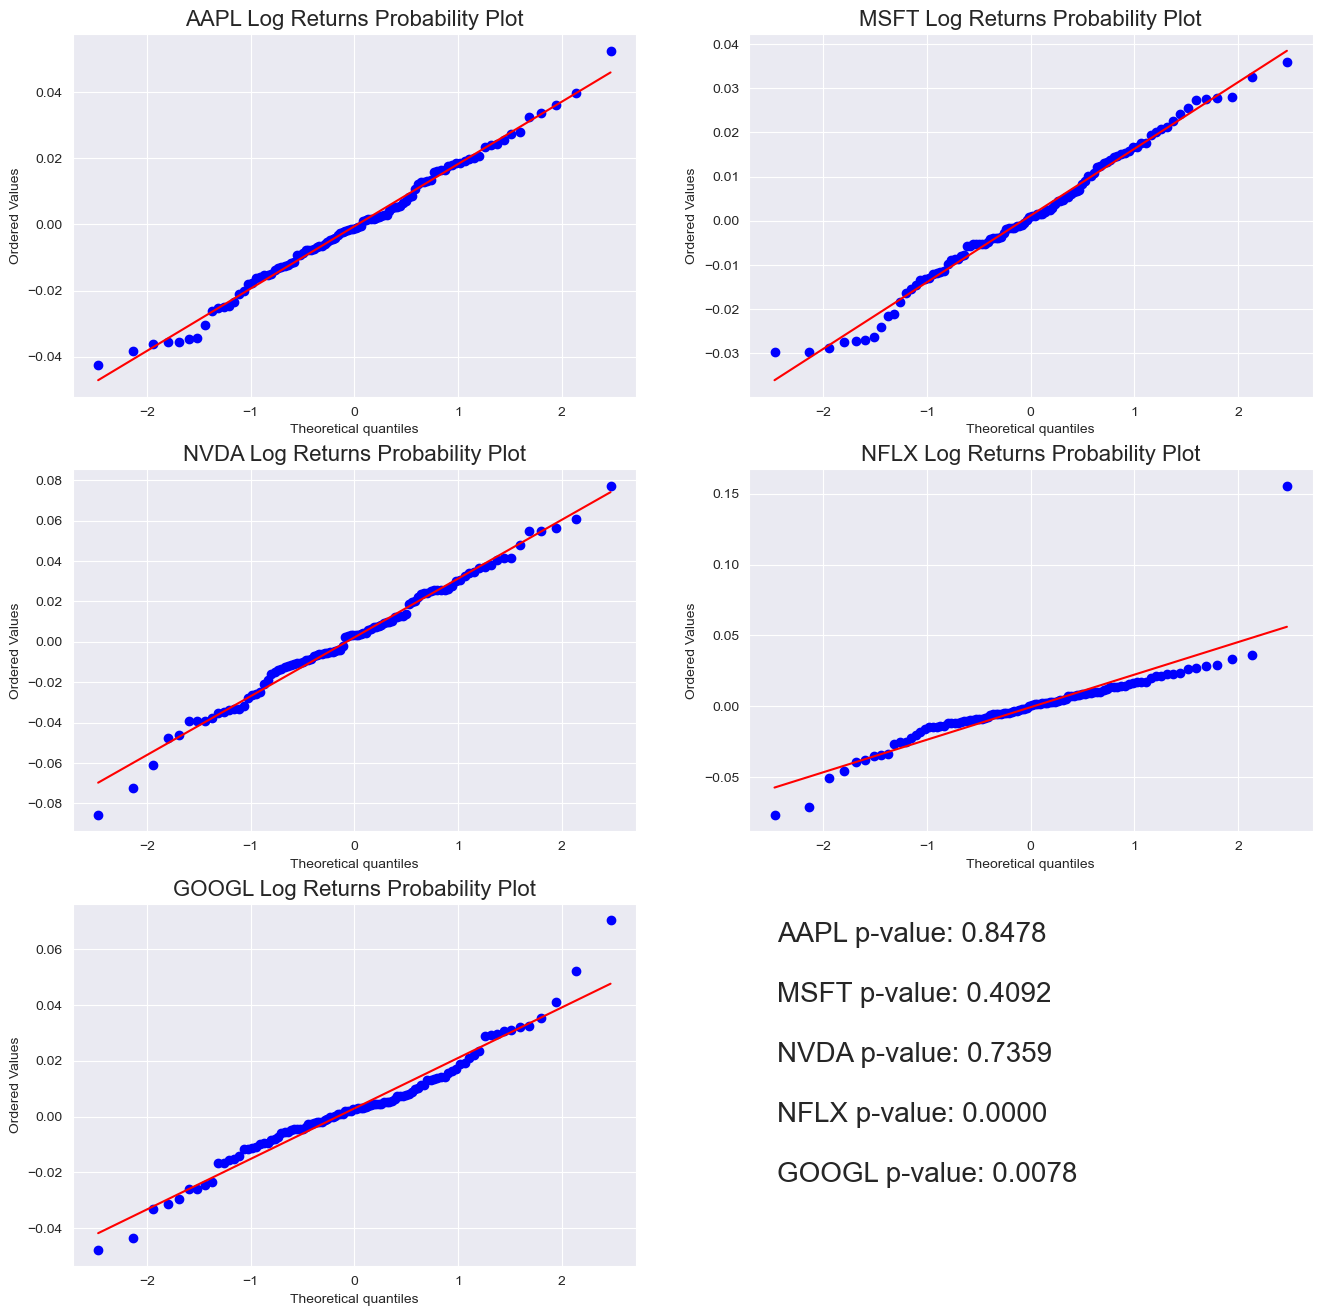

In [69]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 5, 31)
log_returns_1 = log_returns.loc[start:end]

fig, axes = plt.subplots(3, 2, figsize=(16, 16))

p_values =[]
for idx, ticker in enumerate(tickers):
    row, col = divmod(idx, 2)
    stats.probplot(log_returns_1[ticker].values, dist="norm",
                    plot=axes[row, col])
    axes[row, col].set_title(f"{ticker} Log Returns Probability Plot",
                              fontsize=16)
    axes[row,col].grid(True)

    test_stat, p_val = stats.shapiro(log_returns_1[ticker].values)
    p_values.append((ticker, p_val))

# Add p-values as text in the 6th subplot
axes[2, 1].axis('off')  # Hide axes
textstr = '\n\n'.join([f"{ticker} p-value: {p:.4f}" for ticker, p in p_values])
axes[2, 1].text(0.05, 0.95, textstr, fontsize=20, va='top')


plt.show()


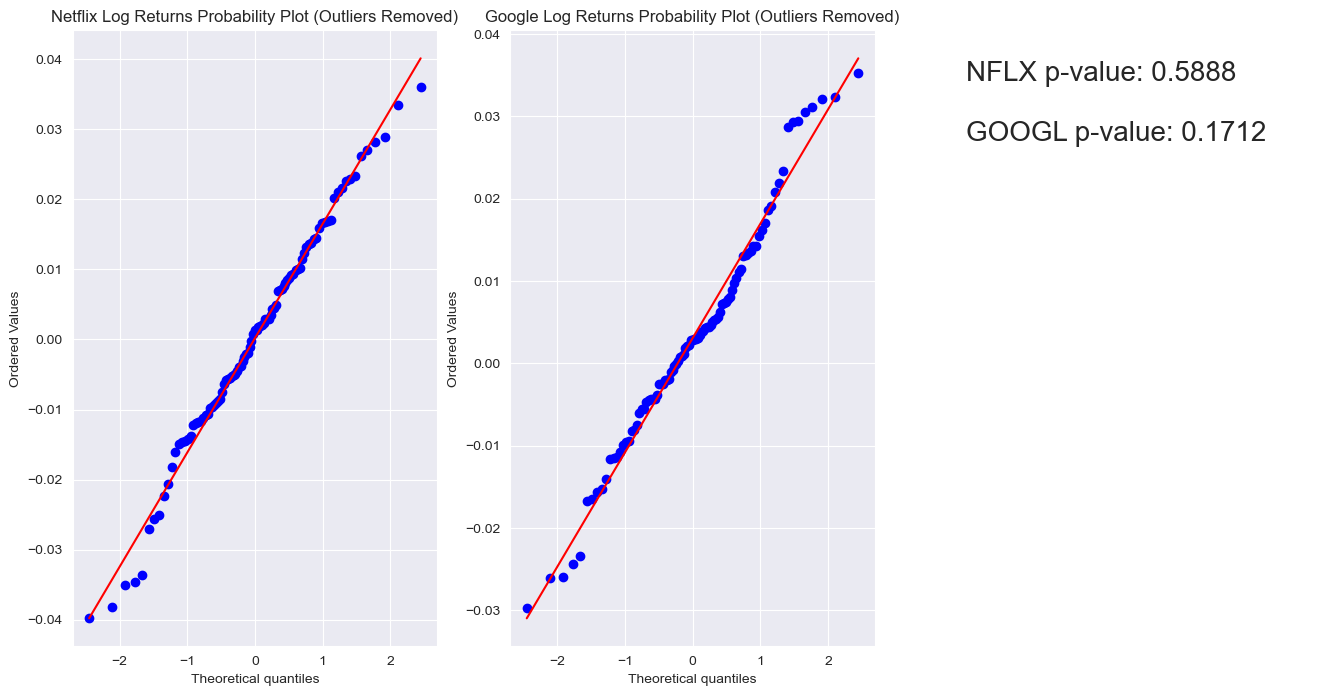

In [70]:
def remove_outlier(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    v1 = q1 - 1.5*iqr
    v2 = q3 + 1.5*iqr
    good_index = np.where((x>=v1) & (x<=v2))
    return(x[good_index])

nflx_out_rm = remove_outlier(log_returns_1[start:end]['NFLX'].values)
googl_out_rm = remove_outlier(log_returns_1[start:end]['GOOGL'].values)
fig, axs = plt.subplots(1, 3, figsize=(16, 8))

stats.probplot(nflx_out_rm, dist="norm", plot=axs[0])
axs[0].set_title("Netflix Log Returns Probability Plot (Outliers Removed)")
axs[0].grid(True)

stats.probplot(googl_out_rm, dist="norm", plot=axs[1])
axs[1].set_title("Google Log Returns Probability Plot (Outliers Removed)")
axs[1].grid(True)

p_val_out_rm = []
for ticker in ['NFLX', 'GOOGL']:
    x = remove_outlier(log_returns_1[start:end][ticker].values)
    test_stat, p = stats.shapiro(x)
    p_val_out_rm.append((ticker, p))

# Add p-values as text in the 6th subplot
axs[2].axis('off')  # Hide axes
textstr = '\n\n'.join([f"{ticker} p-value: {p:.4f}" for ticker, p in p_val_out_rm])
axs[2].text(0.05, 0.95, textstr, fontsize=20, va='top')

plt.show()

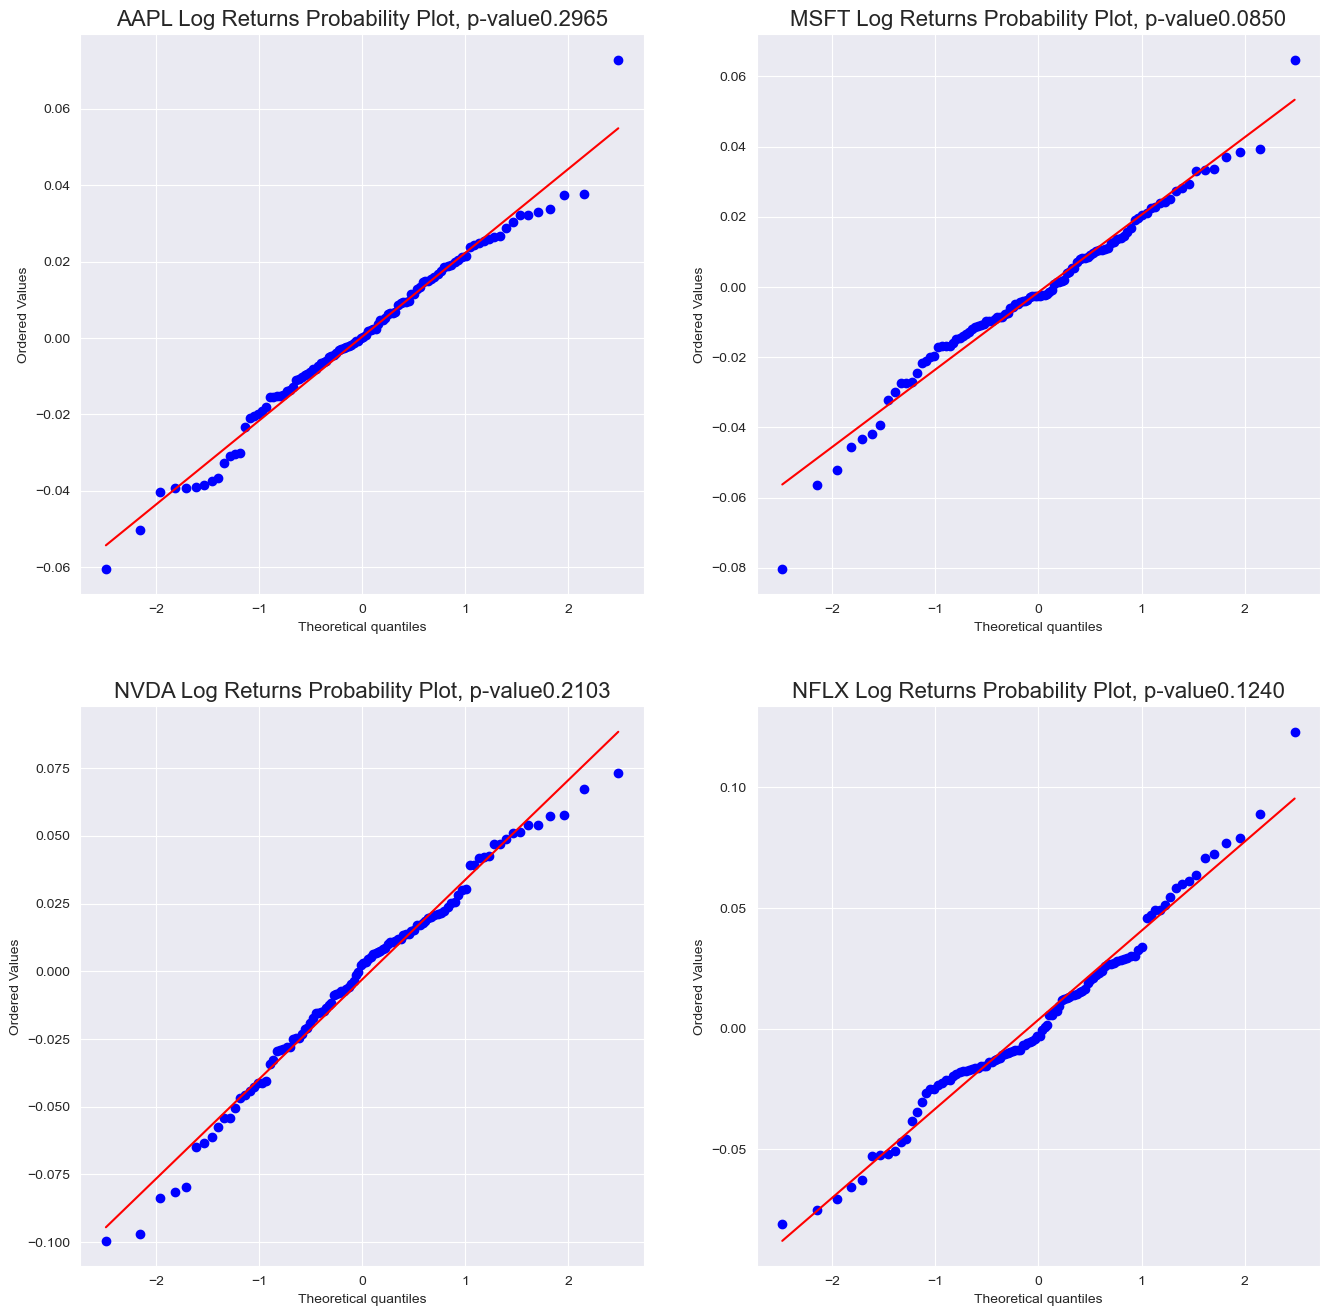

In [71]:
start = dt.datetime(2022, 6, 1)
end = dt.datetime(2022, 10, 31)
portfolio_tickers = ['AAPL', 'MSFT', 'NVDA', 'NFLX']
log_returns_2 = log_returns[portfolio_tickers].loc[start:end]

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for idx, ticker in enumerate(portfolio_tickers):
    test_stat, p_val = stats.shapiro(log_returns_2[ticker].values)
    row, col = divmod(idx, 2)
    stats.probplot(log_returns_2[ticker].values, dist="norm",
                    plot=axes[row, col])
    axes[row, col].set_title(f"{ticker} Log Returns Probability Plot, p-value{p_val:.4f}",
                              fontsize=16)
    axes[row,col].grid(True)

    
    p_values.append((ticker, p_val))

plt.show()


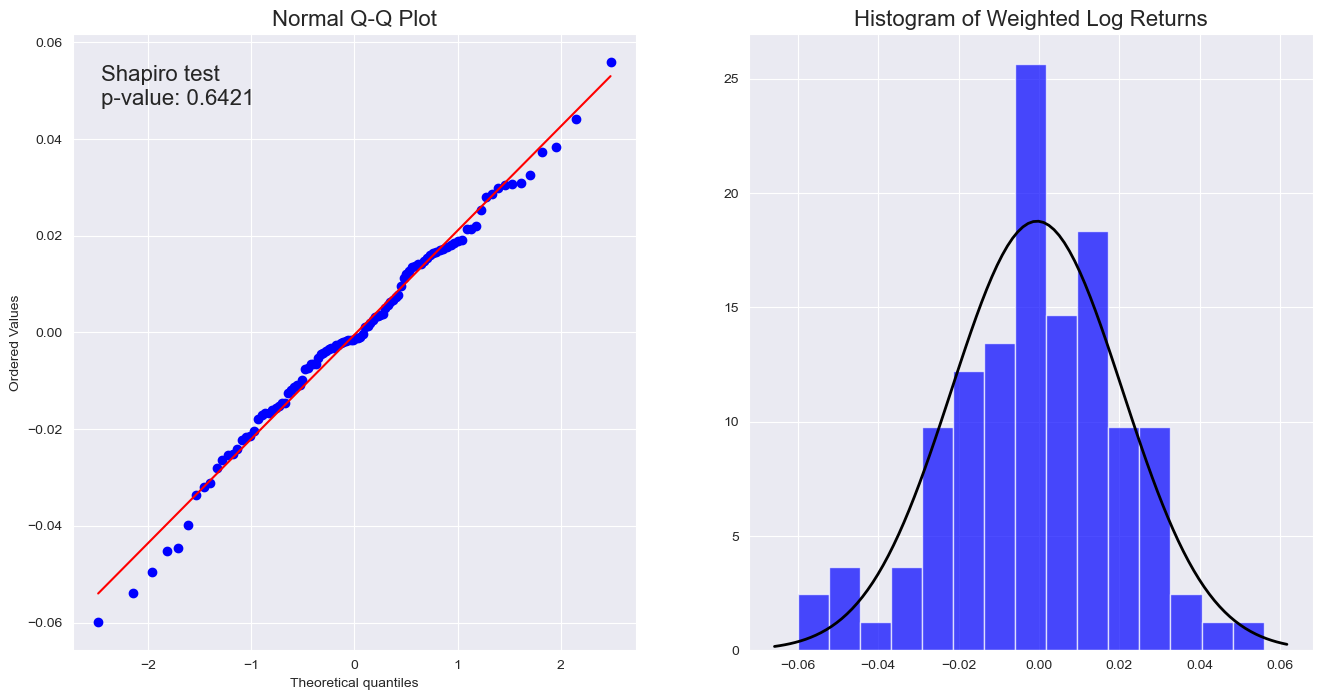

In [ ]:
# Distribution of daily log-return with the low risk protfolio:
wt = np.array([0.2655, 0.6377, 0, 0.0968]) # in the order of AAPL, MSFT, NVDA, NFLX
wt_log_returns = np.dot(log_returns_2, wt)
test_stat, p_val = stats.shapiro(wt_log_returns)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Suppress unwanted output from probplot
with contextlib.redirect_stdout(None):
    stats.probplot(wt_log_returns, dist='norm', plot=axs[0])

axs[0].set_title("Normal Q-Q Plot", fontsize=16)
axs[0].grid(True)
axs[0].text(0.05, 0.95, f'Shapiro test\np-value: {p_val:.4f}',
            transform=axs[0].transAxes, fontsize=16, va='top')

# Histogram on the second subplot
axs[1].hist(wt_log_returns, density=True, bins=15, alpha=0.7, color='b')
axs[1].set_title("Histogram of Weighted Log Returns", fontsize=16)
axs[1].grid(True)

xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, wt_log_returns.mean(), wt_log_returns.std())
plt.plot(x, p, 'k', linewidth=2)
    


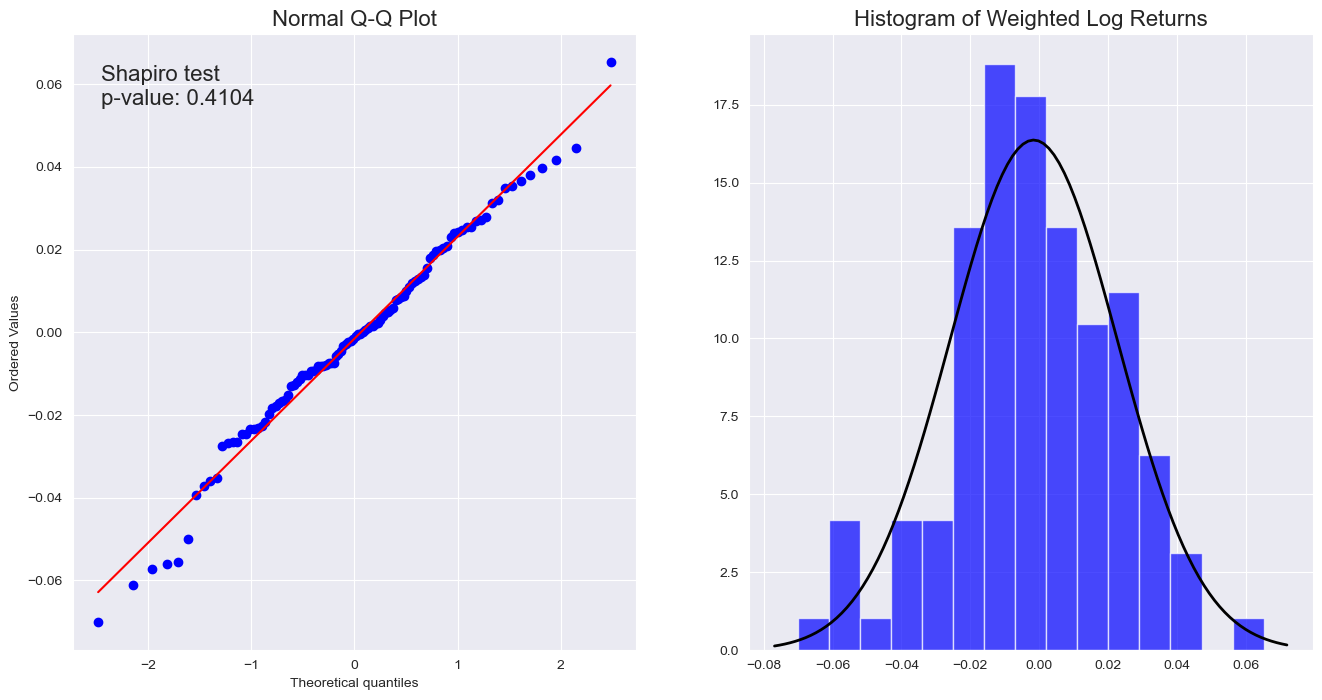

In [ ]:
wt = np.array([0.05, 0.6168, 0.2832, 0.05]) # in the order of AAPL, MSFT, NVDA, NFLX
wt_log_returns = np.dot(log_returns_2, wt)
test_stat, p_val = stats.shapiro(wt_log_returns)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Suppress unwanted output from probplot
with contextlib.redirect_stdout(None):
    stats.probplot(wt_log_returns, dist='norm', plot=axs[0])

axs[0].set_title("Normal Q-Q Plot", fontsize=16)
axs[0].grid(True)
axs[0].text(0.05, 0.95, f'Shapiro test\np-value: {p_val:.4f}',
            transform=axs[0].transAxes, fontsize=16, va='top')

# Histogram on the second subplot
axs[1].hist(wt_log_returns, density=True, bins=15, alpha=0.7, color='b')
axs[1].set_title("Histogram of Weighted Log Returns", fontsize=16)
axs[1].grid(True)

xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, wt_log_returns.mean(), wt_log_returns.std())
plt.plot(x, p, 'k', linewidth=2)
    

In [111]:
new_tickers = ['TSLA', 'AMZN', 'META']
end_date = dt.datetime(2023, 12, 31); start_date = end_date - dt.timedelta(days=1*365)
new_data = yf.download(new_tickers, start=start_date, end=end_date)
new_stock = new_data['Close']

log_returns = np.log(new_stock/new_stock.shift(1))
log_returns.dropna(inplace = True)
log_returns.head()

C:\Users\sayak\AppData\Local\Temp\ipykernel_6916\1969324025.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  new_data = yf.download(new_tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,META,TSLA
Date,,,
2023-01-04,-0.007955,0.020865,0.049979
2023-01-05,-0.024012,-0.003382,-0.029469
2023-01-06,0.034992,0.023974,0.024352
2023-01-09,0.014760,-0.004239,0.057655
2023-01-10,0.028327,0.026825,-0.007711


In [103]:
start = dt.datetime(2023, 1, 1); end = dt.datetime(2023, 12, 29)
log_returns_seg = log_returns.loc[start:end]
print(log_returns_seg[ticker])

Date
2023-01-04    0.049979
2023-01-05   -0.029469
2023-01-06    0.024352
2023-01-09    0.057655
2023-01-10   -0.007711
                ...   
2023-12-22   -0.007731
2023-12-26    0.015988
2023-12-27    0.018647
2023-12-28   -0.032104
2023-12-29   -0.018738
Name: TSLA, Length: 249, dtype: float64


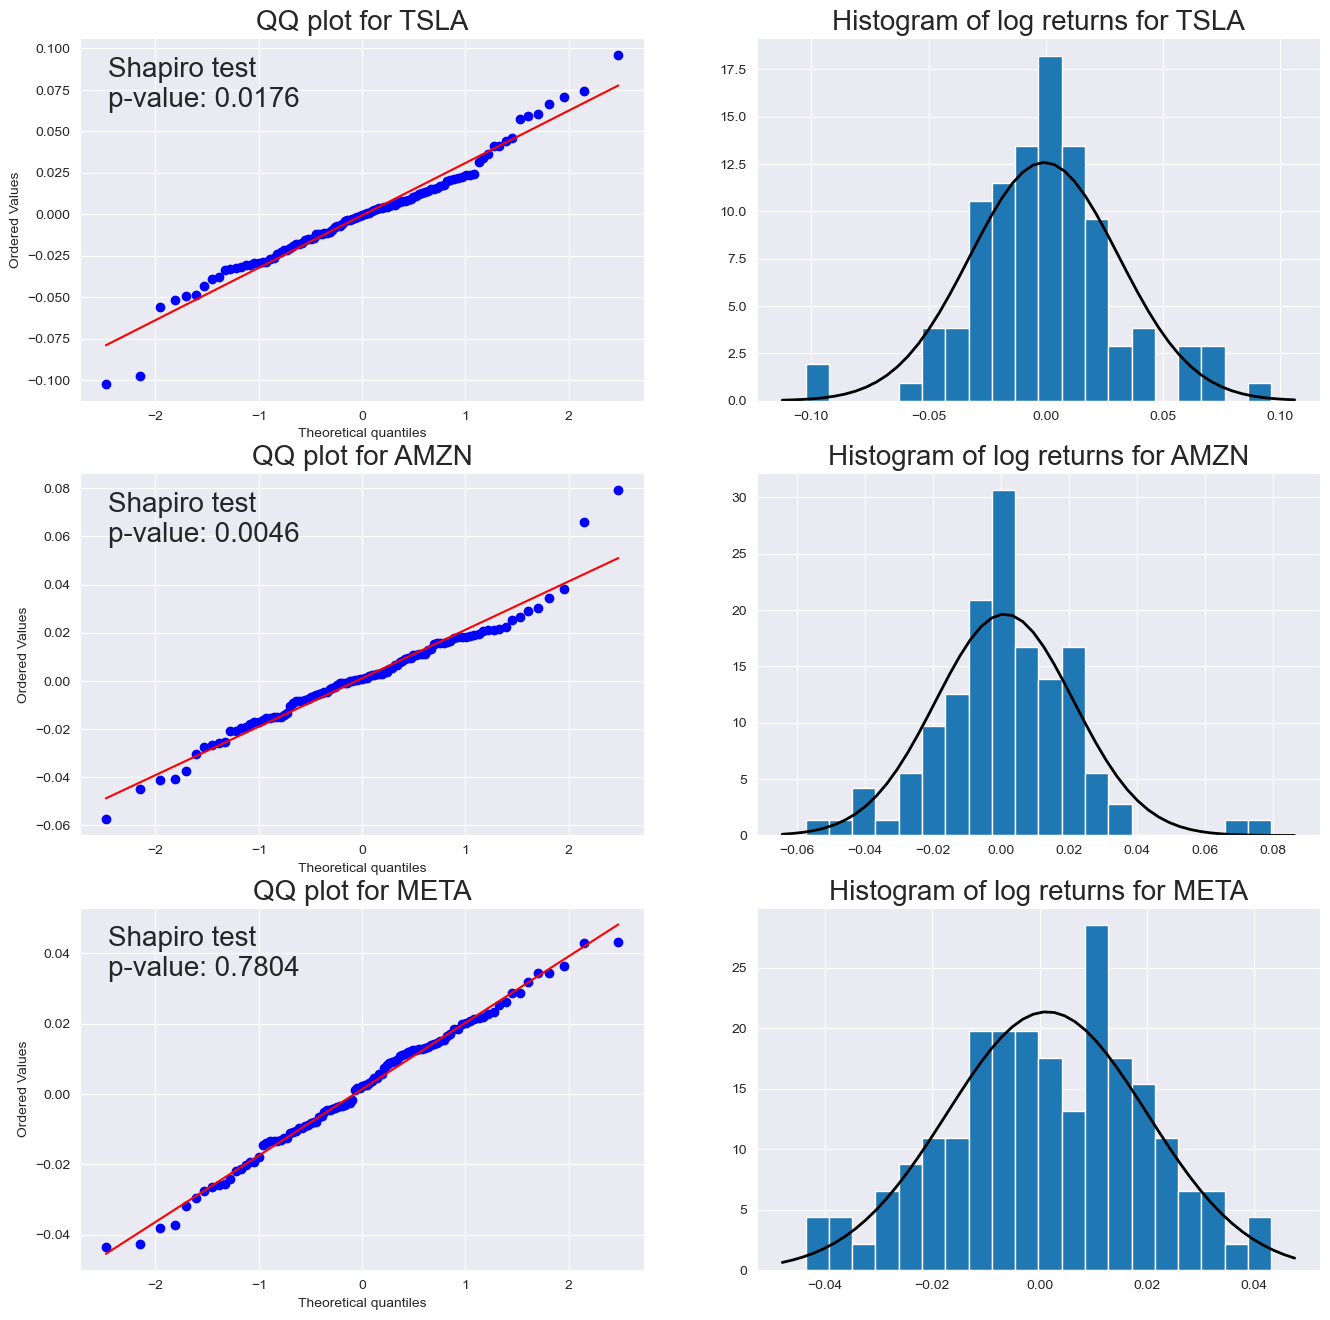

In [144]:
start = dt.datetime(2023, 7, 1); end = dt.datetime(2023, 11, 29)
log_returns_seg = log_returns.loc[start:end]
fig, axes = plt.subplots(3, 2,  figsize=(16, 16) )
for idx, ticker in enumerate(new_tickers):
    test_stat, p_val = stats.shapiro(log_returns_seg[ticker])
    mean, sd = log_returns_seg[ticker].mean(), log_returns_seg[ticker].std()

    stats.probplot(log_returns_seg[ticker], dist = 'norm',
                    plot = axes[idx, 0])
    axes[idx, 0].grid(True)
    axes[idx, 0].set_title(f'QQ plot for {ticker}', fontsize = 20)
    axes[idx, 0].text(0.05, 0.95, f'Shapiro test\np-value: {p_val:.4f}',
            transform=axes[idx, 0].transAxes, fontsize=20, va='top')
    
    axes[idx, 1].hist(log_returns_seg[ticker], density = True, bins = 20)
    xmin, xmax = axes[idx,1].get_xlim()
    x = np.linspace(xmin,xmax)
    y = stats.norm.pdf(x, mean, sd)
    axes[idx, 1].plot(x, y, 'k', linewidth=2)
    axes[idx, 1].set_title(f'Histogram of log returns for {ticker}',
                           fontsize = 20)    

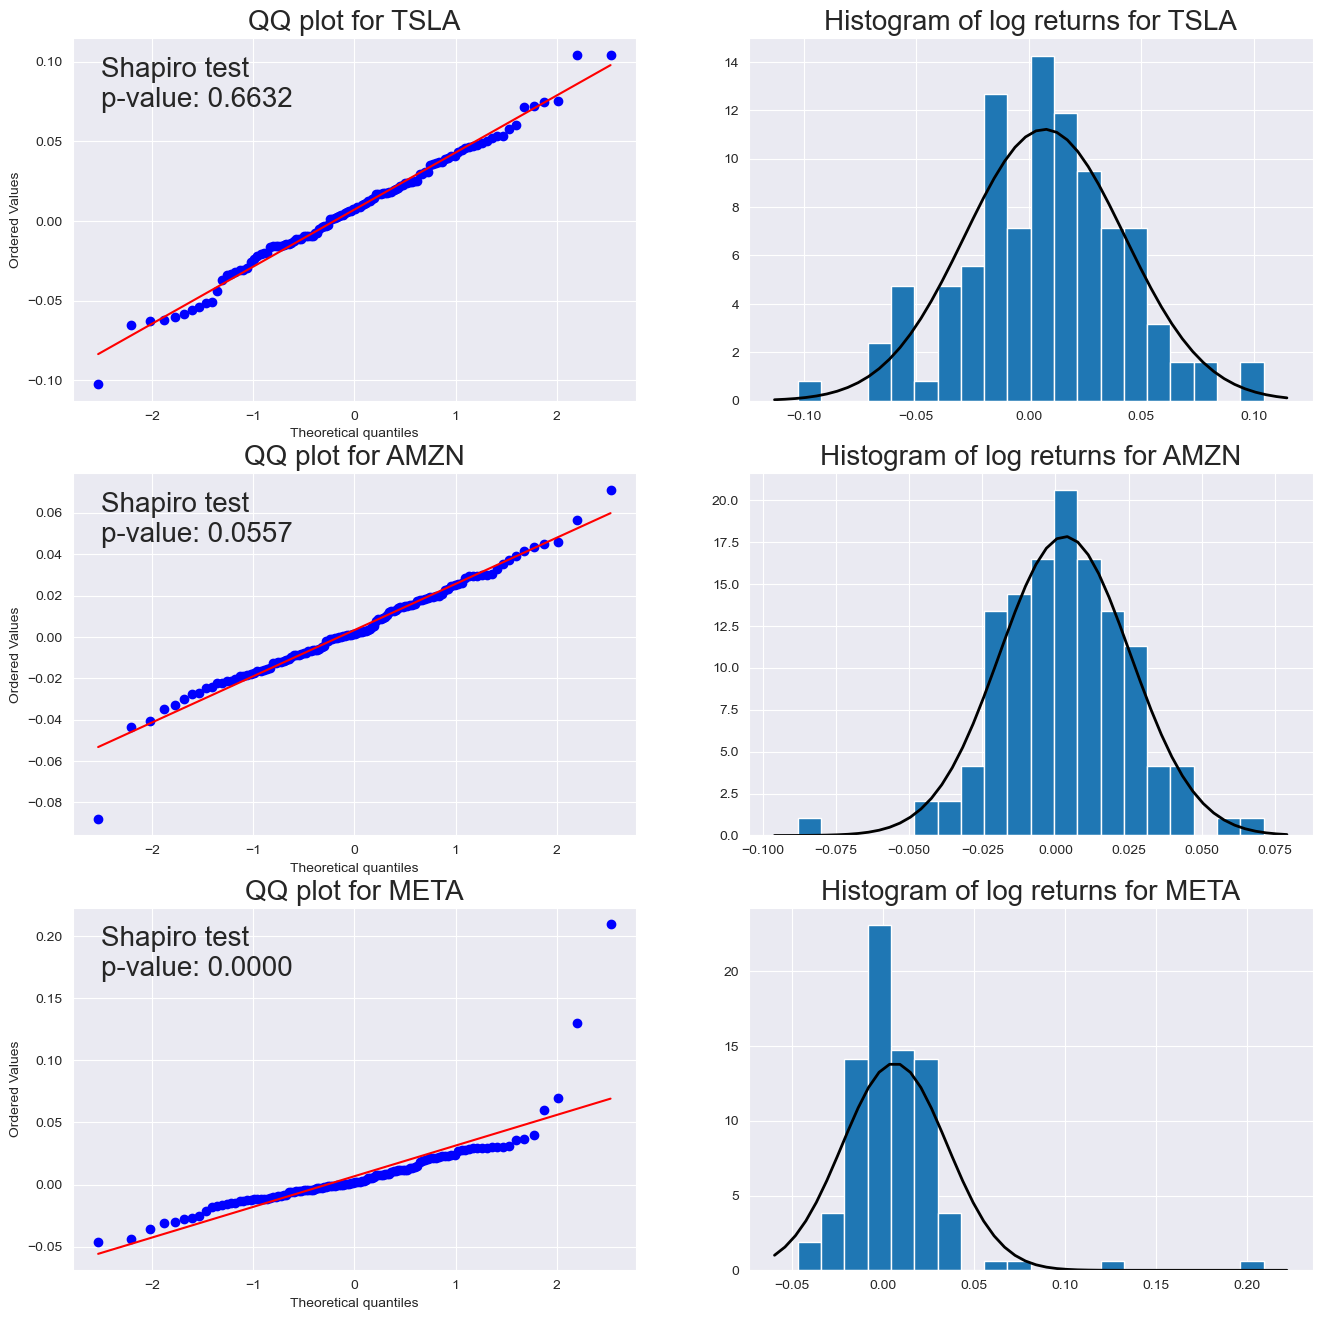

In [140]:
start = dt.datetime(2023, 1, 1); end = dt.datetime(2023, 6, 29)
log_returns_seg = log_returns.loc[start:end]
fig, axes = plt.subplots(3, 2,  figsize=(16, 16) )
for idx, ticker in enumerate(new_tickers):
    test_stat, p_val = stats.shapiro(log_returns_seg[ticker])
    mean, sd = log_returns_seg[ticker].mean(), log_returns_seg[ticker].std()

    stats.probplot(log_returns_seg[ticker], dist = 'norm',
                    plot = axes[idx, 0])
    axes[idx, 0].grid(True)
    axes[idx, 0].set_title(f'QQ plot for {ticker}', fontsize = 20)
    axes[idx, 0].text(0.05, 0.95, f'Shapiro test\np-value: {p_val:.4f}',
            transform=axes[idx, 0].transAxes, fontsize=20, va='top')
    
    axes[idx, 1].hist(log_returns_seg[ticker], density = True, bins = 20)
    xmin, xmax = axes[idx,1].get_xlim()
    x = np.linspace(xmin,xmax)
    y = stats.norm.pdf(x, mean, sd)
    axes[idx, 1].plot(x, y, 'k', linewidth=2)  
    axes[idx, 1].set_title(f'Histogram of log returns for {ticker}',
                           fontsize = 20)      